In [48]:
import pandas as pd

In [49]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


# This is more or less how an alpha signal looks
(its just too sparse)


In [50]:
# | ---previous min --- | --- current min --- | ---- next min ---| --- nnext min --- |
df1 = pd.read_csv('data/quantopian/minuteIntraday/GS.csv').set_index('date')
S1 = df1[['open_price', 'high', 'low', 'close_price']].mean(axis=1)
df2 = pd.read_csv('data/quantopian/minuteIntraday/MSFT.csv').set_index('date')
S2 = df2[['open_price', 'high', 'low', 'close_price']].mean(axis=1)
df = pd.concat([S1,S2, df1.volume, df2.volume], axis=1)
df.columns = ['S1', 'S2', 'V1', 'V2'] 
df['I1'] = (1+df.S1.pct_change())
df['I2'] = (1+df.S2.pct_change())
# lets find patterns by hand
df['F1']=df.I1.shift(-2)
df['F2']=df.I2.shift(-2)
df['target'] = df.F1>df.F2
df['difference']=df.I2-df.I1
df['adding']=df.I2-df.I1

In [51]:
df[df.target==True].V2.describe()

count    4.880200e+04
mean     4.448672e+04
std      9.747233e+04
min      0.000000e+00
25%      1.908950e+04
50%      3.045300e+04
75%      4.999000e+04
max      1.077367e+07
Name: V2, dtype: float64

In [52]:
df['bigVolume']=df.V2>5e5

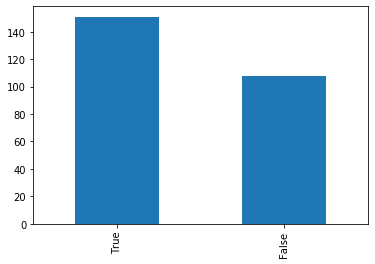

In [53]:
df[df.bigVolume].target.value_counts().plot.bar()

## Lets try a different target

In [54]:
df1 = pd.read_csv('data/quantopian/minuteIntraday/GS.csv').set_index('date')
df1['S1'] = df1[['open_price', 'high', 'low', 'close_price']].mean(axis=1)
df2 = pd.read_csv('data/quantopian/minuteIntraday/MSFT.csv').set_index('date')
df2['S2'] = df2[['open_price', 'high', 'low', 'close_price']].mean(axis=1)
df = pd.concat([S1,S2, df1.volume, df2.volume], axis=1)
df.columns = ['S1', 'S2', 'V1', 'V2'] 
df['IV1']=(df.V1-df.V1.shift(1))/(df.V1.shift(1)+1)
df['IV2']=(df.V2-df.V2.shift(1))/(df.V2.shift(1)+1)
df['DIV']=df.IV1-df.IV2
df['FI1']= (df.S1.shift(-5)/df.S1.shift(-1))
df['FI2']= (df.S2.shift(-5)/df.S2.shift(-1))
df['target'] = df.FI1>df.FI2

In [55]:
df.DIV.describe()

count     97739.000000
mean         -9.119508
std        2536.084171
min     -607497.000000
25%          -0.535451
50%          -0.003861
75%           0.743329
max       14349.978612
Name: DIV, dtype: float64

In [88]:
df.DIV.memory_usage()

4185280